# 1. 선형회귀 모델

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from datetime import datetime
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False



In [70]:
# 데이터 로드
data = pd.read_csv('last.csv')
data  = data.dropna()

In [71]:
# 날짜 및 요일 전처리
data['날짜'] = pd.to_datetime(data['날짜'])
data['요일'] = data['날짜'].dt.dayofweek
data['월'] = data['날짜'].dt.month
data['주차'] = data['날짜'].dt.isocalendar().week
# 필요한 특성 선택
features = ['요일', '평균기온(℃)', '평균 이동인구',]
target = '합계'

X = data[features]
y = data[target]


In [72]:
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 학습된 모델의 계수 및 절편 출력
print('계수:', model.coef_)
print('절편:', model.intercept_)


계수: [-5.34918465e+01 -9.71155578e-01  2.08413988e-02]
절편: -396.6865883611381


이 부분이 의미가 있는 결과인지 모르겠습니다

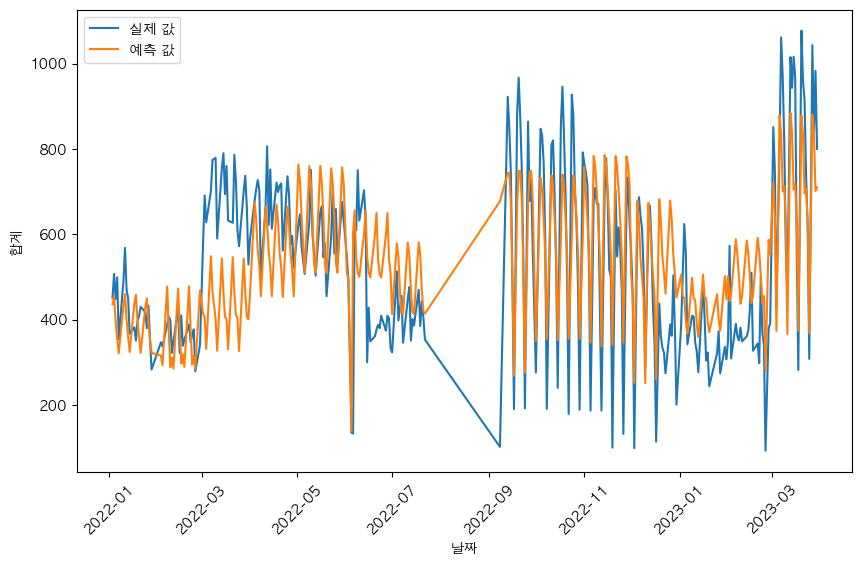

In [73]:
# 예측 결과 계산
predictions = model.predict(X)

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(data['날짜'], y, label='실제 값')
plt.plot(data['날짜'], predictions, label='예측 값')
plt.xlabel('날짜')
plt.ylabel('합계')
plt.legend()
plt.xticks(rotation=45)
plt.show()


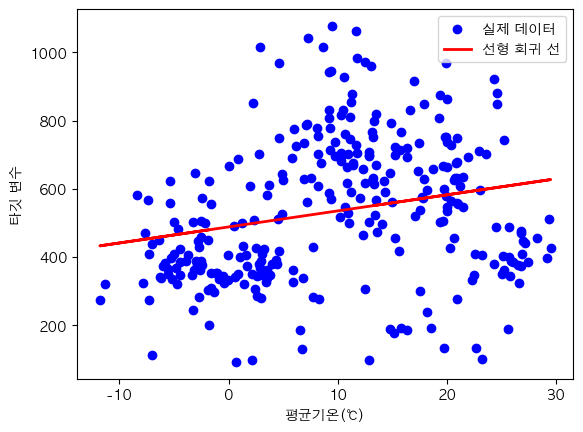

In [74]:

# 입력 데이터와 예측값 추출
X = data['평균기온(℃)']
y = data[target]

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# 예측값 계산
y_pred = model.predict(X.values.reshape(-1, 1))

# 산점도 그리기
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', linewidth=2, label='선형 회귀 선')
plt.xlabel('평균기온(℃)')
plt.ylabel('타깃 변수')
plt.legend()
plt.show()




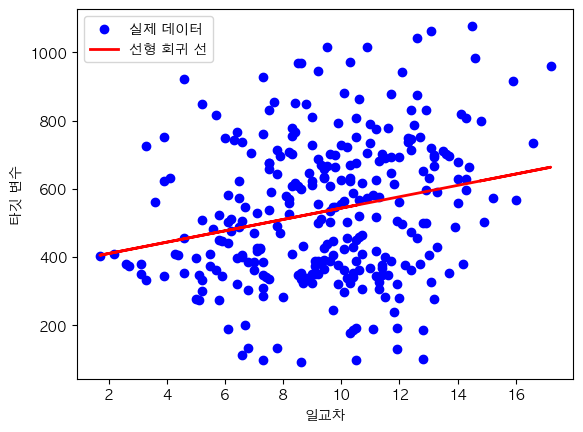

In [75]:

# 입력 데이터와 예측값 추출
X = data['일교차']
y = data[target]

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# 예측값 계산
y_pred = model.predict(X.values.reshape(-1, 1))

# 산점도 그리기
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', linewidth=2, label='선형 회귀 선')
plt.xlabel('일교차')
plt.ylabel('타깃 변수')
plt.legend()
plt.show()


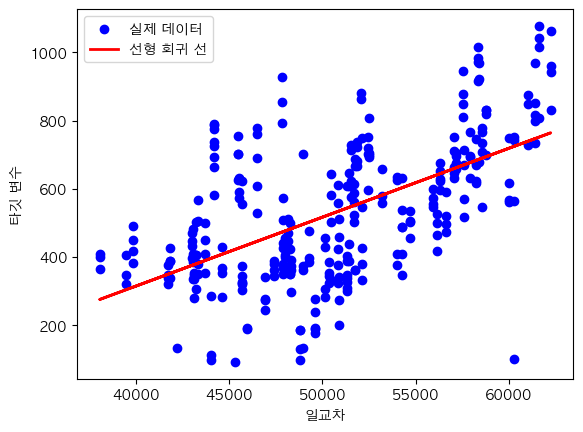

In [76]:

# 입력 데이터와 예측값 추출
X = data['평균 이동인구']
y = data[target]

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# 예측값 계산
y_pred = model.predict(X.values.reshape(-1, 1))

# 산점도 그리기
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', linewidth=2, label='선형 회귀 선')
plt.xlabel('일교차')
plt.ylabel('타깃 변수')
plt.legend()
plt.show()

In [77]:
# 입력 데이터와 타깃 변수 분리
X = data[['평균기온(℃)', '요일','평균 이동인구','주차','월']]
y = data['합계']

# 트레인셋과 테스트셋으로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트셋에 대한 예측
y_pred = model.predict(X_test)

# 평균 제곱 오차(Mean Squared Error) 계산
mse = mean_squared_error(y_test, y_pred)
print('평균 제곱 오차:', mse)

평균 제곱 오차: 16786.797389132185


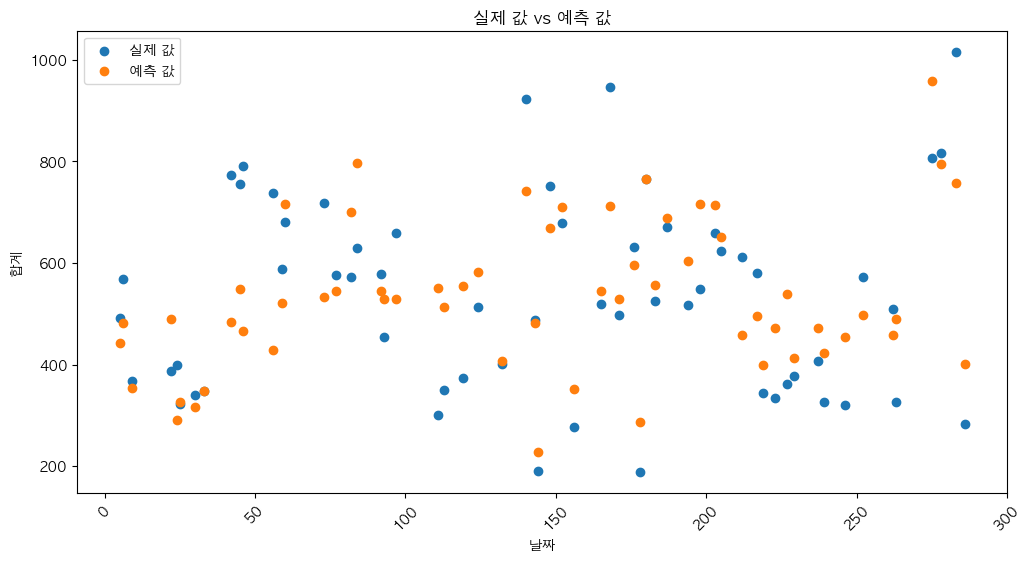

In [78]:

# 예측값과 실제 결과를 가지고 있는 데이터프레임 생성results = pd.DataFrame({'날짜': data.loc[X_test.index, '날짜'], '실제 값': y_test, '예측 값': y_pred})
results = pd.DataFrame({'실제 값': y_test, '예측 값': y_pred})
results['날짜'] = X_test.index  # 인덱스를 '날짜' 열로 설정

# 날짜를 x축으로 설정하여 시각화
plt.figure(figsize=(12, 6))
plt.scatter(results['날짜'], results['실제 값'], label='실제 값', marker='o')
plt.scatter(results['날짜'], results['예측 값'], label='예측 값', marker='o')
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('실제 값 vs 예측 값')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [79]:
X = data[['평균기온(℃)', '요일','평균 이동인구','주차','월','날짜']]
y = data['합계']

# 트레인셋과 테스트셋으로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


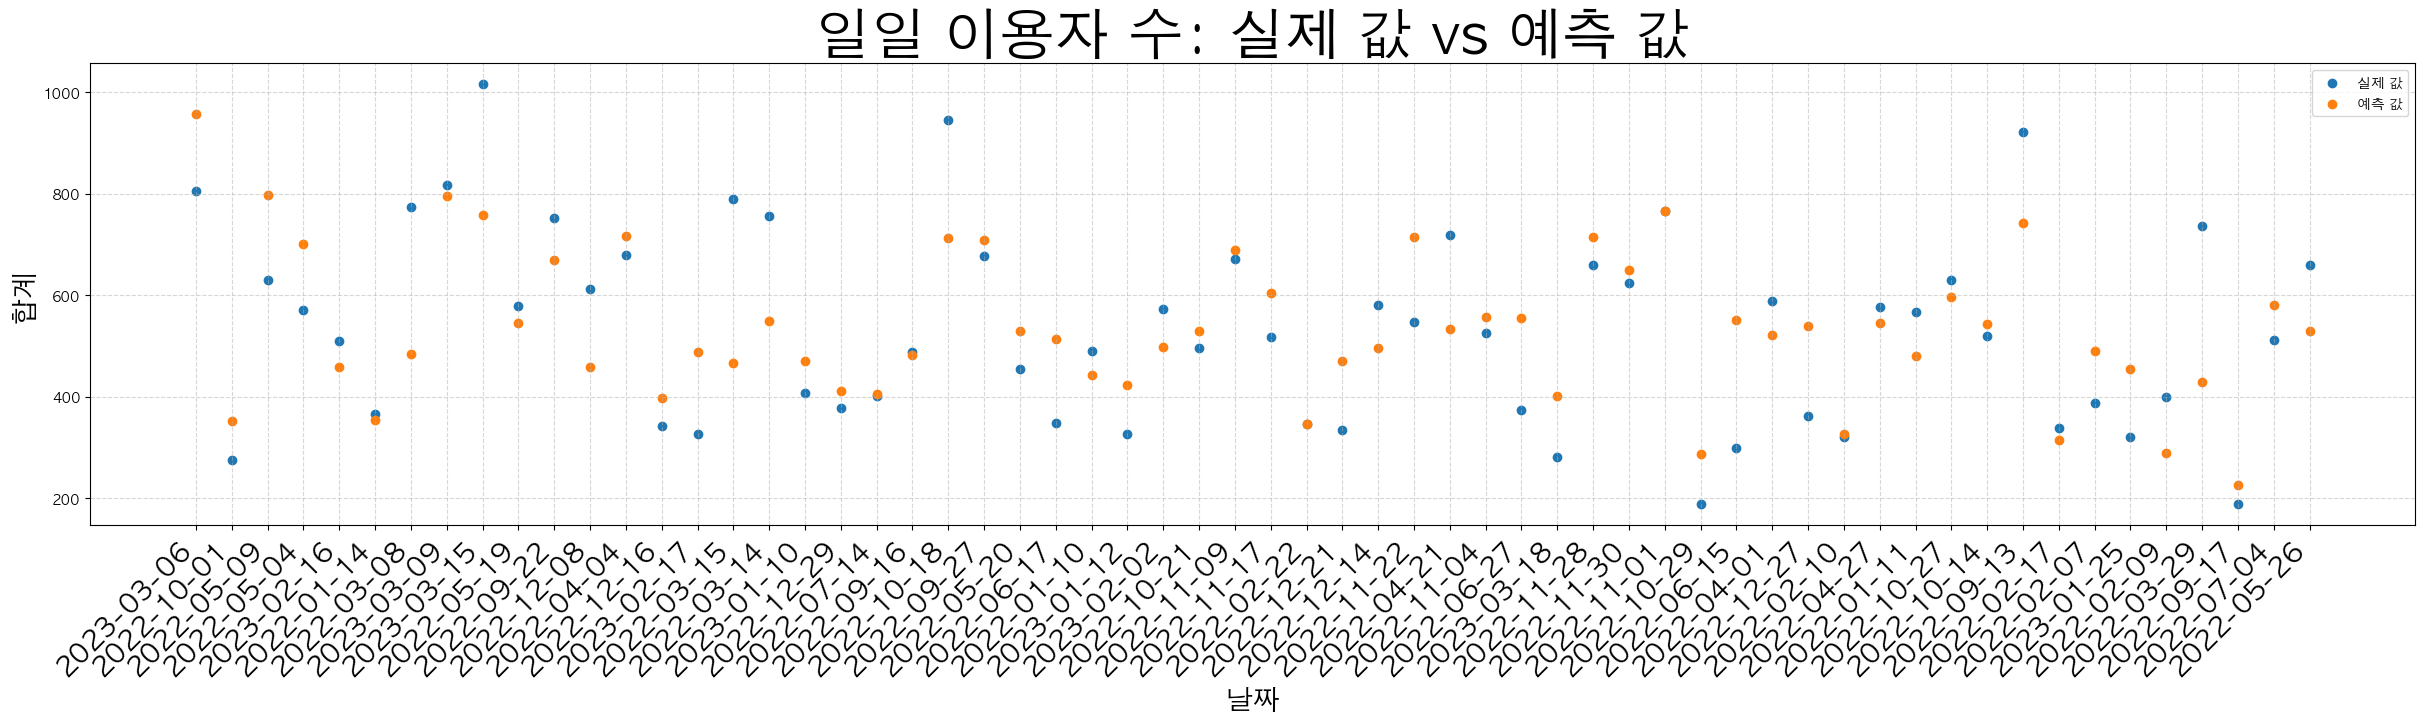

In [80]:
# Convert date column to string format
X_test['날짜'] = X_test['날짜'].astype(str)

# Plot the actual and predicted values
plt.figure(figsize=(30, 6))
plt.scatter(X_test['날짜'], y_test.values, label='실제 값')
plt.scatter(X_test['날짜'], y_pred, label='예측 값')
plt.xlabel('날짜', fontsize=20)
plt.ylabel('합계', fontsize=20)
plt.title('일일 이용자 수: 실제 값 vs 예측 값', fontsize=40)
plt.legend()
plt.xticks(rotation=45, fontsize=20,ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()
